In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# print(customers.info())
# print(products.info())
# print(transactions.info())
data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")

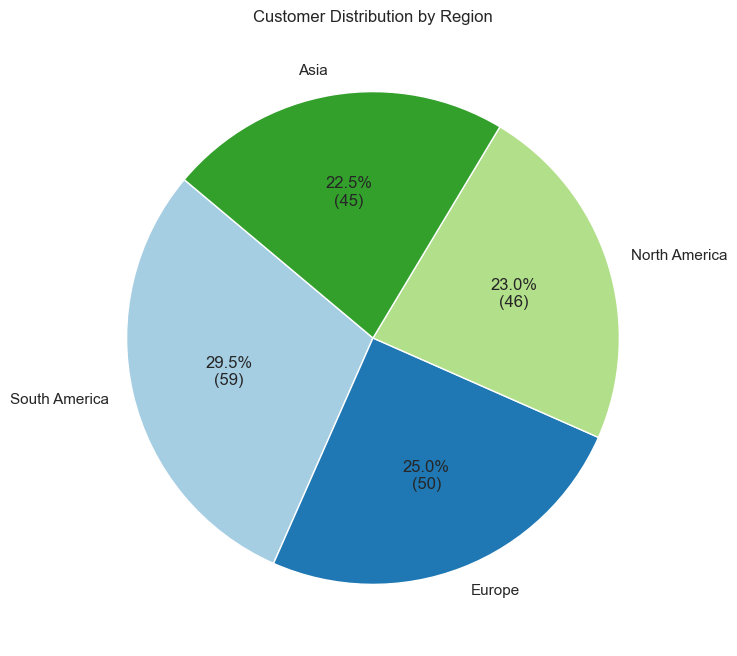

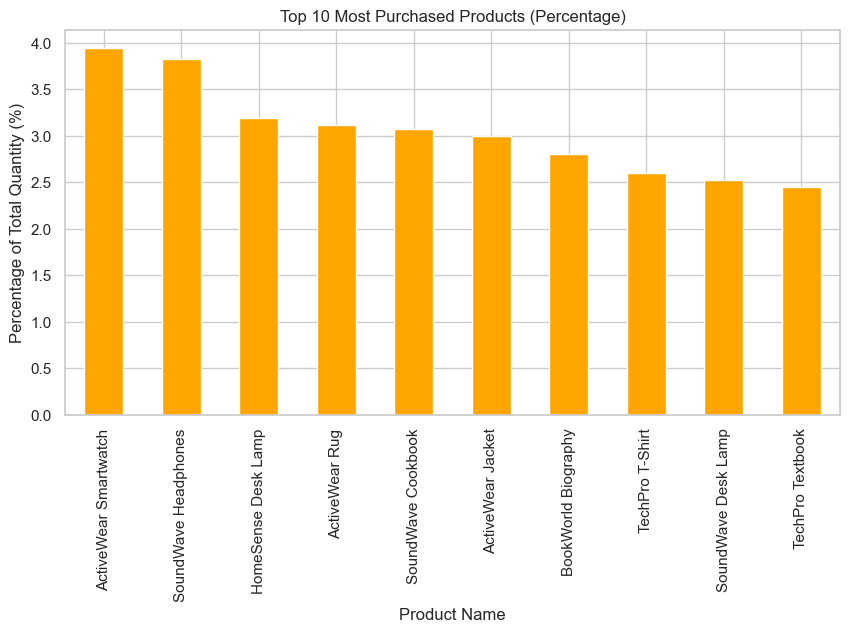

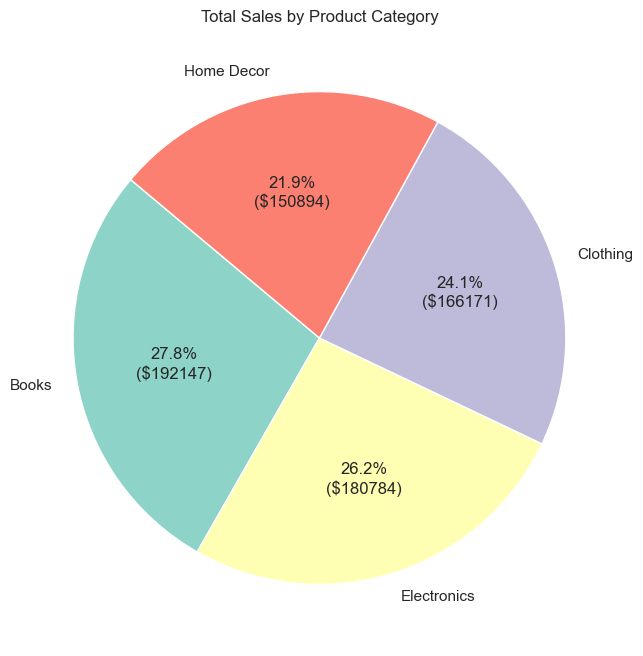

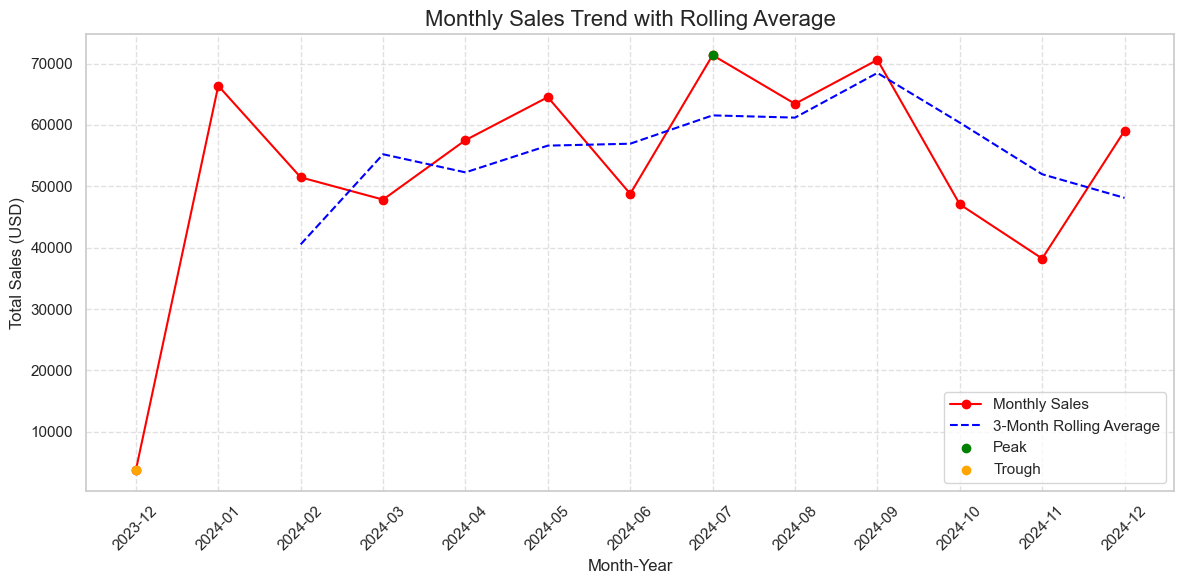

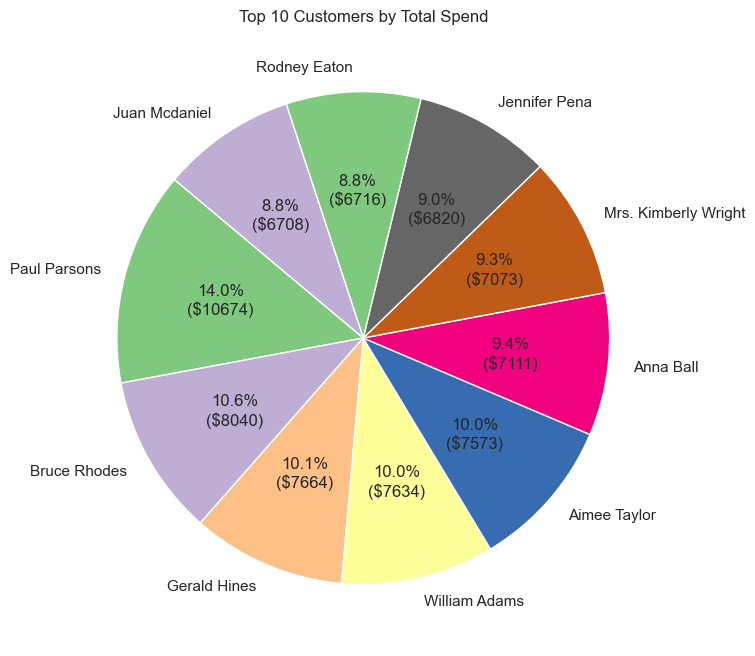

In [12]:
# 1. Distribution of customers by region (Pie Chart with Percentages)
region_counts = customers['Region'].value_counts()
region_percentages = (region_counts / region_counts.sum()) * 100
region_counts.plot(
    kind='pie', 
    autopct=lambda p: f'{p:.1f}%\n({int(round(p * region_counts.sum() / 100))})', 
    title='Customer Distribution by Region', 
    figsize=(8, 8), 
    colors=plt.cm.Paired.colors,
    startangle=140
)
plt.ylabel('') 
plt.show()

# 2. Top 10 most purchased products (Bar Chart with Percentages)
total_quantity = data['Quantity'].sum()
top_products = data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
top_products_percentage = (top_products / total_quantity) * 100
top_products_percentage.plot(
    kind='bar', 
    title='Top 10 Most Purchased Products (Percentage)', 
    figsize=(10, 5), 
    color='orange'
)
plt.xlabel('Product Name')
plt.ylabel('Percentage of Total Quantity (%)')
plt.show()

# 3. Total sales by product category (Pie Chart with Percentages)
category_sales = data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
category_sales_percentage = (category_sales / category_sales.sum()) * 100
category_sales.plot(
    kind='pie', 
    autopct=lambda p: f'{p:.1f}%\n(${int(round(p * category_sales.sum() / 100))})', 
    title='Total Sales by Product Category', 
    figsize=(8, 8), 
    colors=plt.cm.Set3.colors,
    startangle=140
)
plt.ylabel('') 
plt.show()

# 4. Monthly transaction trends 
sns.set_theme(style="whitegrid")

data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

data['MonthYear'] = data['TransactionDate'].dt.to_period('M')
monthly_sales = data.groupby("MonthYear")["TotalValue"].sum()

rolling_avg = monthly_sales.rolling(window=3).mean()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values, marker='o', label='Monthly Sales', color='red')
plt.plot(monthly_sales.index.astype(str), rolling_avg.values, linestyle='--', label='3-Month Rolling Average', color='blue')

peaks = monthly_sales[monthly_sales == monthly_sales.max()]
troughs = monthly_sales[monthly_sales == monthly_sales.min()]

plt.scatter(peaks.index.astype(str), peaks.values, color='green', label='Peak', zorder=5)
plt.scatter(troughs.index.astype(str), troughs.values, color='orange', label='Trough', zorder=5)

plt.title('Monthly Sales Trend with Rolling Average', fontsize=16)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Total Sales (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()


# 5. Most valuable customers (Pie Chart with Percentages)
top_customers = data.groupby("CustomerName")["TotalValue"].sum().sort_values(ascending=False).head(10)
top_customers_percentage = (top_customers / top_customers.sum()) * 100
top_customers.plot(
    kind='pie', 
    autopct=lambda p: f'{p:.1f}%\n(${int(round(p * top_customers.sum() / 100))})', 
    title='Top 10 Customers by Total Spend', 
    figsize=(8, 8), 
    colors=plt.cm.Accent.colors,
    startangle=140
)
plt.ylabel('')
plt.show()
